In [1]:
import pandas as pd
import numpy as np

In [35]:
df = pd.read_csv('heartrate.csv')

In [36]:
df.head()

,VO2 (L/min),HR (b/min)
0,0.477371,53.446602
1,0.370690,53.932039
2,0.373922,57.087379
3,0.322198,58.058252
4,0.302802,57.572816


In [37]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline


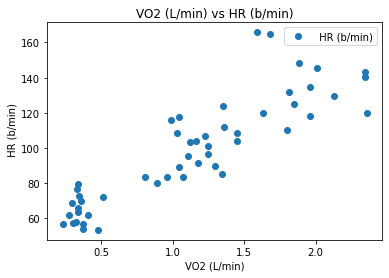

In [38]:
df.plot(x='VO2 (L/min)', y=' HR (b/min)', style='o')  
plt.title('VO2 (L/min) vs HR (b/min)')  
plt.xlabel('VO2 (L/min)')  
plt.ylabel(' HR (b/min)')  
plt.show()


In [39]:
X = df['VO2 (L/min)'].values.reshape(-1,1)
y = df[' HR (b/min)'].values.reshape(-1,1)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


LinearRegression()

In [52]:
regressor.predict([[0.4]])


array([[68.55999308]])

In [41]:
y_pred = regressor.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_pred


,Actual,Predicted
0,108.543689,94.882207
1,68.737864,64.094939
2,69.951456,66.660545
3,91.553398,101.093673
4,57.087379,67.470736
5,103.203883,98.663100
6,140.582524,149.705149
7,104.174757,112.301319
8,101.262136,103.794311
9,57.572816,64.500035


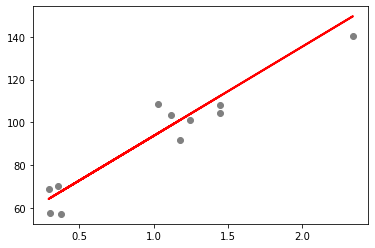

In [42]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 6.978969575177937
Mean Squared Error: 59.8306358121489
Root Mean Squared Error: 7.735026555361585


In [44]:
import pickle


In [45]:
filename = 'heartrate.sav'
pickle.dump(regressor, open(filename, 'wb'))


In [46]:
loaded_model = pickle.load(open('heartrate.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9016341546972744


In [48]:
loaded_model.predict(0.4)

ValueError: Expected 2D array, got scalar array instead:
array=0.4.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [67]:
def heartrate(VO2):
    # this function returns a message, exercise, recommendation, learn more, and a heartrate
    # WHAT DO THE VARIABLES MEAN?
    # Message is a sting that says if the heart rate low/high/normal
    # exercise is a list of exercise to do
    # recommendation is a list additional things to do 
    # learn more is where to read more about results

    # EXAMPLE TO CALL THE FUNCTION
    # heartrate(0.5) 

    heartrate_model = pickle.load(open('heartrate.sav', 'rb')) 
    heartrate = heartrate_model.predict([[VO2]]) # Predict heart rate
    message = '' 
    exercise = []
    output = ''
    recommendation = []
    learn_more ='https://www.nasa.gov/mission_pages/station/research/station-science-101/cardiovascular-health-in-microgravity/'

    if heartrate < 40:
        message=  'Your heartrate is low: ' + str(heartrate[0][0])[:2] + ' (b/min)'
        exercise.append('Advanced Resistive Exercise Device (ARED)')
        exercise.append('treadmill')
        exercise.append('stationary bike')
        recommendation.append('wear special trousers that use pressure differences to pull blood back into the abdomen and legs.')

    elif heartrate > 90:
        message = 'Your heartrate is high: ' + str(heartrate[0][0])[:2] + ' (b/min)'
        exercise.append('Advanced Resistive Exercise Device (ARED)')
        exercise.append('treadmill')
        exercise.append('stationary bike')
    else:
        message = 'Your heartrate is normal: '+ str(heartrate[0][0])[:2] + ' (b/min)'

    # print(message, exercise, recommendation, learn_more)
    return message, exercise, recommendation, learn_more, 

('Your heartrate is high: [[135.3917704]] (b/min)',
 ['Advanced Resistive Exercise Device (ARED)', 'treadmill', 'stationary bike'],
 [],
 'https://www.nasa.gov/mission_pages/station/research/station-science-101/cardiovascular-health-in-microgravity/')